# Questrade Portfolio Manager

In [1]:
import os
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import src.credentials as cred
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [2]:
switch = 1

if switch == 1:
    ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
    QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE
else:
    ACCOUNT_NUM = cred.MJ_QUESTRADE_ACCOUNT_NUM
    QUESTRADE_TOKEN = cred.MJ_QUESTRADE_API_CODE


qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

## Account Balance

In [3]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.336500,0.00,31785.336500,100.00,0.00
USD,22868.853943,9036.88,31905.733943,71.68,28.32


## Portfolio Holdings

In [4]:
portfolio = qbot.get_investment_summary()
portfolio

{'symbol': 'MMM', 'symbolId': 38677, 'openQuantity': 3, 'closedQuantity': 0, 'currentMarketValue': 542.64, 'currentPrice': 180.88, 'averageEntryPrice': 196.88, 'dayPnl': 2.49, 'closedPnl': 0, 'openPnl': -48, 'totalCost': 590.64, 'isRealTime': False, 'isUnderReorg': False}
{'symbol': 'O', 'symbolId': 33821, 'openQuantity': 75, 'closedQuantity': 0, 'currentMarketValue': 4953.75, 'currentPrice': 66.05, 'averageEntryPrice': 61.2, 'dayPnl': 78.75, 'closedPnl': 0, 'openPnl': 363.75, 'totalCost': 4590, 'isRealTime': False, 'isUnderReorg': False}
{'symbol': 'JPM', 'symbolId': 24177, 'openQuantity': 6, 'closedQuantity': 0, 'currentMarketValue': 995.7, 'currentPrice': 165.95, 'averageEntryPrice': 153.46, 'dayPnl': -0.78, 'closedPnl': 0, 'openPnl': 74.94, 'totalCost': 920.76, 'isRealTime': False, 'isUnderReorg': False}
{'symbol': 'VTI', 'symbolId': 40571, 'openQuantity': 3, 'closedQuantity': 0, 'currentMarketValue': 673.47, 'currentPrice': 224.49, 'averageEntryPrice': 195.68, 'dayPnl': 0.45, 'clo

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,542.64,-8.13,6.00
O,REALTY INCOME CORP,USD,75,4953.75,7.92,54.82
JPM,JPMORGAN CHASE & CO.,USD,6,995.70,8.14,11.02
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,673.47,14.72,7.45
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,718.56,12.39,7.95
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,577.36,-4.83,6.39
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,575.40,-3.00,6.37


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

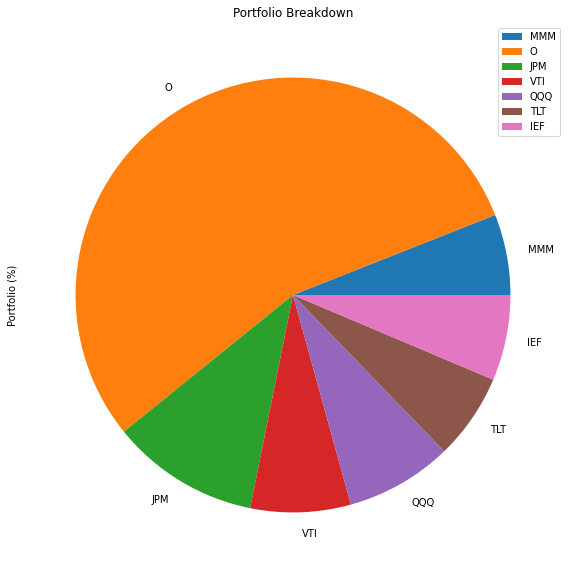

In [5]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

## Portfolio Return

In [6]:
portfolio_return = (portfolio['Return (%)'].dot(portfolio['Portfolio (%)'])) / 100
portfolio_return

6.33288

## Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

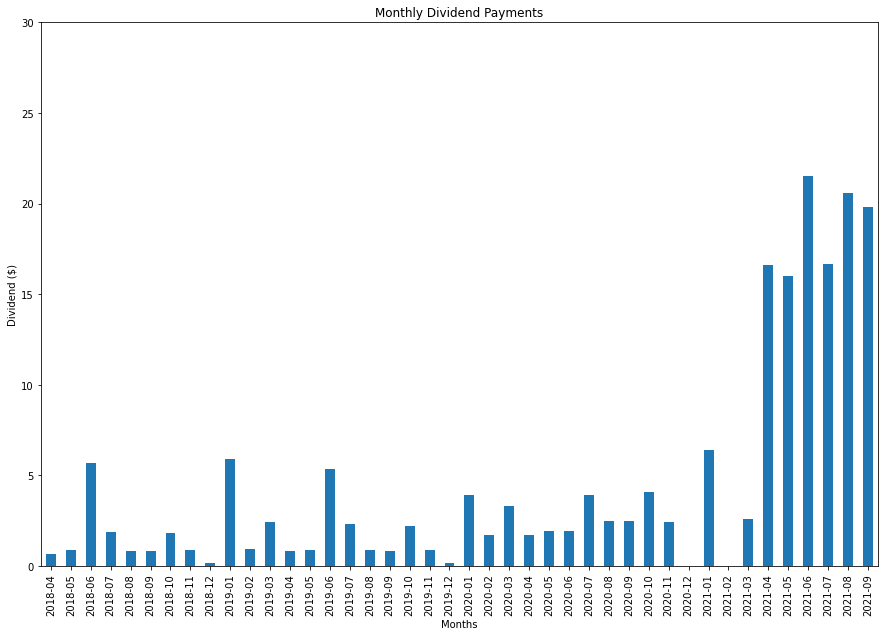

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

## Performance Against Benchmark